In [1]:
# load JSON
import json
import pandas as pd
 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])

df = data

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
plt.plot(df['ds'],df['y'])

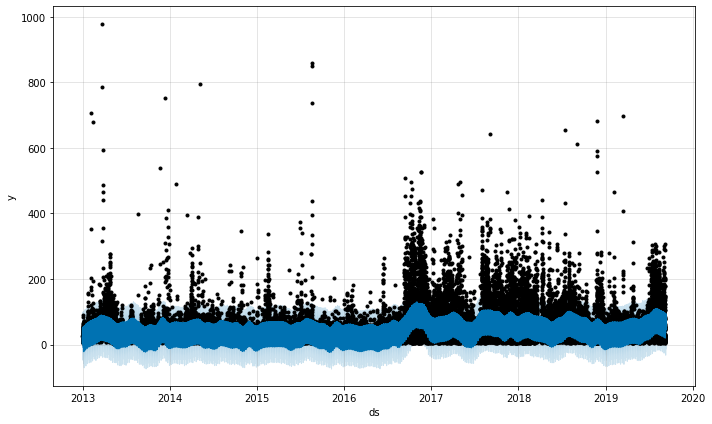

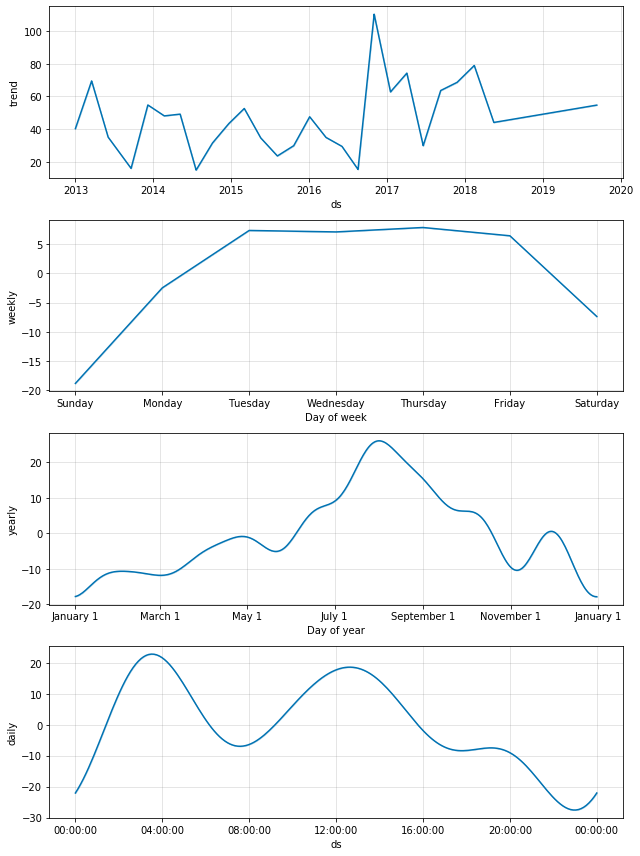

In [2]:
from fbprophet import Prophet
m = Prophet(changepoint_prior_scale=0.5) #  Increasing scale will make the trend more flexible:
m.fit(df)
future = m.make_future_dataframe(periods=48, freq='H')
forecast = m.predict(future)
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
fig = m.plot(forecast)
components_fig = m.plot_components(forecast)

In [5]:
# PROPHET validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon ='365 days') # horizon: forecast ; initial: training (default: 3x horizon); 
df_cv.head()

INFO:fbprophet:Making 8 forecasts with cutoffs between 2015-03-28 19:00:00 and 2018-09-08 19:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-03-28 20:00:00,21.009275,-14.792066,56.557430,18.0,2015-03-28 19:00:00
1,2015-03-28 21:00:00,15.128733,-18.965062,50.666402,18.0,2015-03-28 19:00:00
2,2015-03-28 22:00:00,6.556401,-31.766397,43.859916,8.0,2015-03-28 19:00:00
3,2015-03-28 23:00:00,2.128542,-34.697101,37.018581,8.0,2015-03-28 19:00:00
4,2015-03-29 00:00:00,6.501249,-28.858441,43.938084,26.0,2015-03-28 19:00:00


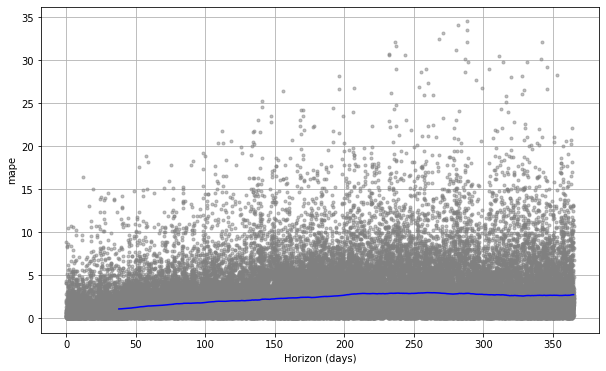

In [6]:
# Performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

# mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE)
# computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff).
# By default, 10% of the predictions in each window (can be changed) 
# high rollingwindow --> smoother average curve 

# Visualize cross-validation
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
